In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/dataset/mobile_addiction_data.csv')

Mounted at /content/drive


In [ ]:
df.head()

,User_ID,Country,Age,Gender,Occupation,Education_Level,Income_USD,Daily_Screen_Time_Hours,Phone_Unlocks_Per_Day,Social_Media_Usage_Hours,...,Online_Shopping_Hours,Internet_Connection_Type,Primary_Device_Brand,Has_Screen_Time_Management_App,Self_Reported_Addiction_Level,Monthly_Data_Usage_GB,Has_Night_Mode_On,Age_First_Phone,Push_Notifications_Per_Day,Tech_Savviness_Score
0,1,India,32,Male,Salesperson,High School,43865.49,5.81,75,0.84,...,1.85,5G,Other,No,Low,16.43,Yes,16,106,39.36
1,2,UK,26,Male,Artist,Master's,41868.19,9.05,61,3.13,...,0.66,4G,Samsung,Yes,Severe,32.87,No,12,111,9.45
2,3,Germany,70,Other,Doctor,High School,59636.51,5.76,58,2.12,...,-0.14,WiFi,Samsung,Yes,Severe,27.45,No,18,90,50.27
3,4,UK,44,Female,Engineer,NaN,39022.07,6.71,80,1.60,...,0.17,3G,Apple,Yes,Moderate,30.85,No,17,60,30.82
4,5,Brazil,46,Other,Student,NaN,-783.98,6.31,136,1.51,...,0.58,3G,Xiaomi,No,High,10.38,Yes,18,127,21.70


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   User_ID                         3000 non-null   int64  
 1   Country                         3000 non-null   object 
 2   Age                             3000 non-null   int64  
 3   Gender                          3000 non-null   object 
 4   Occupation                      3000 non-null   object 
 5   Education_Level                 2388 non-null   object 
 6   Income_USD                      3000 non-null   float64
 7   Daily_Screen_Time_Hours         3000 non-null   float64
 8   Phone_Unlocks_Per_Day           3000 non-null   int64  
 9   Social_Media_Usage_Hours        3000 non-null   float64
 10  Gaming_Usage_Hours              3000 non-null   float64
 11  Streaming_Usage_Hours           3000 non-null   float64
 12  Messaging_Usage_Hours           30

In [ ]:
df.isnull().sum()

,0
User_ID,0
Country,0
Age,0
Gender,0
Occupation,0
Education_Level,612
Income_USD,0
Daily_Screen_Time_Hours,0
Phone_Unlocks_Per_Day,0
Social_Media_Usage_Hours,0


In [ ]:
df['Occupation'] = df['Occupation'].str.strip().str.title()
df['Gender'] = df['Gender'].str.strip().str.capitalize()
df['Country'] = df['Country'].str.strip().str.title()

df['Occupation'].unique()
df['Gender'].unique()
df['Country'].unique()

array(['India', 'Uk', 'Germany', 'Brazil', 'Japan', 'China', 'Russia',
       'Nigeria', 'Usa', 'Mexico'], dtype=object)

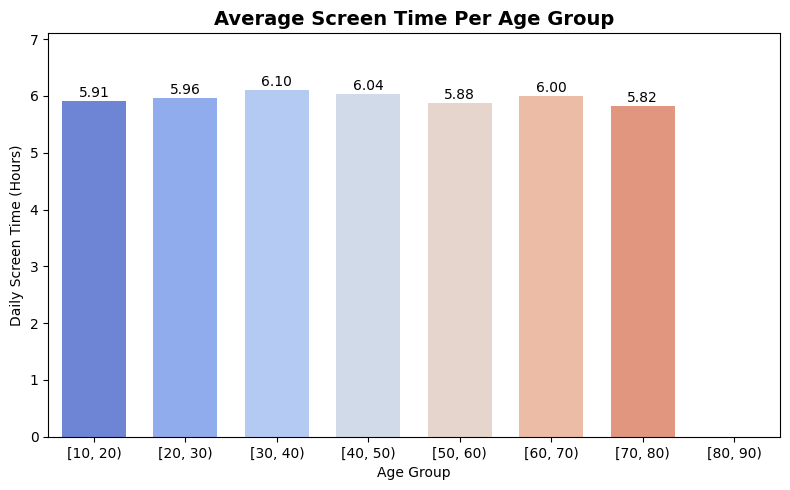

In [ ]:
df['Age_Group'] = pd.cut(df['Age'], bins=[10,20,30,40,50,60,70,80,90], right=False)
avg_screen_by_age = df.groupby('Age_Group', observed=True)['Daily_Screen_Time_Hours'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=avg_screen_by_age,
            x='Age_Group',
            y='Daily_Screen_Time_Hours',
            hue='Age_Group',
            dodge=False,
            palette='coolwarm',
            legend=False,
            width=0.7
            )

# Tambahin label angka di atas batang
for i, val in enumerate(avg_screen_by_age['Daily_Screen_Time_Hours']):
    plt.text(i, val + 0.02, f'{val:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Average Screen Time Per Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Daily Screen Time (Hours)')
plt.ylim(0, avg_screen_by_age['Daily_Screen_Time_Hours'].max() + 1)
plt.tight_layout()
plt.show()


,Age,Avg_Screen_Time,Avg_Sleep_Hours,Avg_Mental_Health
0,12,5.930465,6.431163,52.975581
1,13,6.024915,6.459153,49.059322
2,14,5.830164,6.656066,51.547377
3,15,6.482432,6.720270,50.872432
4,16,5.970943,6.183585,48.122264
5,17,5.914800,6.185200,56.770000
6,18,5.886327,6.462857,50.033673
7,19,5.383333,6.333529,52.566863
8,20,5.974884,6.214419,44.049302
9,21,5.514510,6.561765,48.445882


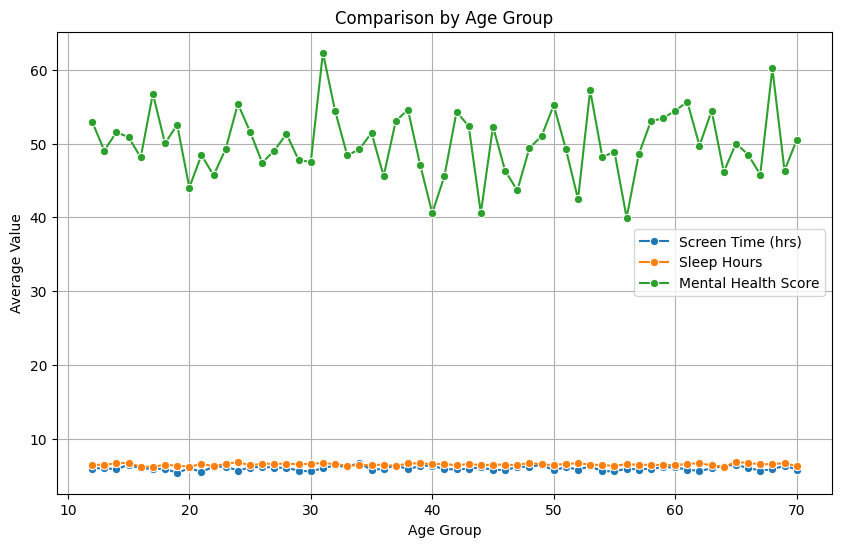

Kelompok umur dengan screen time tertinggi: 34
Kelompok umur dengan screen time terendah: 19


In [ ]:
# 1. Hitung rata-rata per rentang umur untuk 3 variabel
avg_screen = df.groupby('Age')['Daily_Screen_Time_Hours'].mean()
avg_sleep = df.groupby('Age')['Sleep_Hours'].mean()
avg_mental = df.groupby('Age')['Mental_Health_Score'].mean()

# 2. Gabungkan jadi satu DataFrame
age_analysis = pd.DataFrame({
    'Avg_Screen_Time': avg_screen,
    'Avg_Sleep_Hours': avg_sleep,
    'Avg_Mental_Health': avg_mental
}).reset_index()

display(age_analysis)

# 3. Visualisasi multi-line untuk membandingkan
plt.figure(figsize=(10,6))
sns.lineplot(data=age_analysis, x='Age', y='Avg_Screen_Time', label='Screen Time (hrs)', marker='o')
sns.lineplot(data=age_analysis, x='Age', y='Avg_Sleep_Hours', label='Sleep Hours', marker='o')
sns.lineplot(data=age_analysis, x='Age', y='Avg_Mental_Health', label='Mental Health Score', marker='o')

plt.title('Comparison by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

# 4. Insight otomatis sederhana
max_screen_age = age_analysis.loc[age_analysis['Avg_Screen_Time'].idxmax(), 'Age']
min_screen_age = age_analysis.loc[age_analysis['Avg_Screen_Time'].idxmin(), 'Age']

print(f"Kelompok umur dengan screen time tertinggi: {max_screen_age}")
print(f"Kelompok umur dengan screen time terendah: {min_screen_age}")


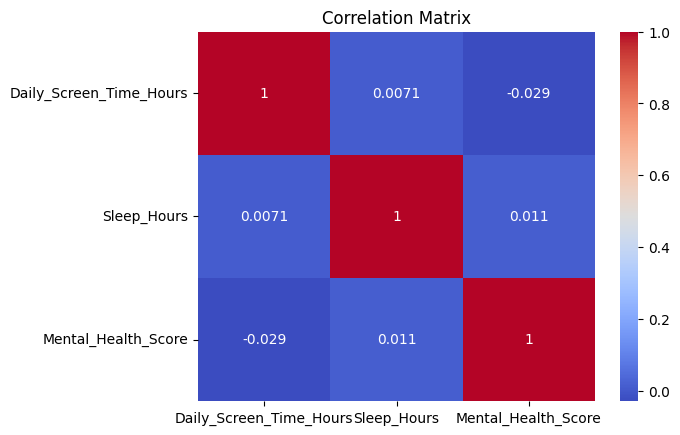

In [ ]:
corr = df[['Daily_Screen_Time_Hours', 'Sleep_Hours', 'Mental_Health_Score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Insight dan Rekomendasi**

Analisis menunjukkan bahwa kelompok usia 30–40 tahun memiliki rata-rata screen time harian tertinggi, sedangkan kelompok usia 70–80 tahun memiliki screen time terendah. Hal ini mengindikasikan bahwa pola penggunaan perangkat digital lebih banyak dipengaruhi oleh faktor usia dan gaya hidup dibandingkan dengan jam tidur maupun kondisi kesehatan mental.

Hasil uji korelasi memperkuat temuan ini. Hubungan antara screen time, jam tidur, dan skor kesehatan mental sangat lemah, hampir mendekati nol. Artinya, peningkatan atau penurunan screen time dalam dataset ini tidak serta merta memengaruhi durasi tidur atau kondisi kesehatan mental. Dengan demikian, asumsi awal bahwa screen time yang tinggi akan menurunkan jam tidur dan berdampak negatif pada kesehatan mental tidak terkonfirmasi pada data ini.

Meskipun demikian, temuan ini membuka peluang analisis lebih lanjut. Variabel lain seperti jenis pekerjaan, negara, atau kualitas tidur kemungkinan besar akan memberikan penjelasan yang lebih komprehensif. Terutama pada kelompok usia 30–40 tahun yang memiliki screen time tertinggi, perlu ada perhatian lebih karena rentang usia ini juga merupakan usia produktif yang rawan terhadap stres pekerjaan. Program literasi digital atau edukasi mengenai keseimbangan antara aktivitas daring dan luring dapat menjadi salah satu strategi untuk menjaga kesehatan jangka panjang.

Secara keseluruhan, dataset ini menunjukkan bahwa screen time memang bervariasi antar kelompok usia, tetapi dampaknya terhadap tidur dan kesehatan mental tidak terlihat signifikan. Analisis mendalam dengan variabel tambahan masih diperlukan agar dapat memberikan gambaran yang lebih jelas mengenai risiko jangka panjang dari penggunaan perangkat digital yang berlebihan.